In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('shop_smart_ecommerce.csv')

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
df['Revenue'].value_counts() # Imbalance data

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [18]:
print(df["Revenue"].value_counts(normalize=True))

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


In [19]:
# check for missing values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [21]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [22]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [37]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [23]:
# Identify cateogorical vs numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

print('Categorical: ', categorical_cols)
print('Numerical: ', numerical_cols)

Categorical:  Index(['Month', 'VisitorType'], dtype='object')
Numerical:  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'],
      dtype='object')


In [26]:
# Encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True


In [30]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [27]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42,
    stratify=y
)

In [31]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
4263,8,732.25,0,0.0,34,1345.755952,0.005128,0.013342,12.274195,0.8,...,False,False,False,False,True,False,False,False,False,True
5905,0,0.00,0,0.0,4,157.200000,0.040000,0.100000,0.000000,0.0,...,False,False,False,False,False,False,True,False,False,True
9434,0,0.00,0,0.0,4,42.000000,0.000000,0.050000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
3505,2,338.00,0,0.0,17,1205.566667,0.012500,0.037500,19.236250,0.8,...,False,False,False,False,True,False,False,False,False,True
2067,0,0.00,0,0.0,32,827.646212,0.000000,0.000587,54.676348,0.0,...,False,False,False,True,False,False,False,False,False,True


In [34]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 9864 entries, 4263 to 11430
Series name: Revenue
Non-Null Count  Dtype
--------------  -----
9864 non-null   bool 
dtypes: bool(1)
memory usage: 86.7 KB


In [58]:
y_train.value_counts()

Revenue
False    8338
True     1526
Name: count, dtype: int64

## Decision Tree - NO pruning

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print('Train F1: ', f1_score(y_train, y_train_pred))
print('Test F1: ', f1_score(y_test, y_test_pred))

print('Classification Report (Test):')
print(classification_report(y_test, y_test_pred))

Train F1:  1.0
Test F1:  0.5570291777188329
Classification Report (Test):
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      2084
        True       0.56      0.55      0.56       382

    accuracy                           0.86      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466



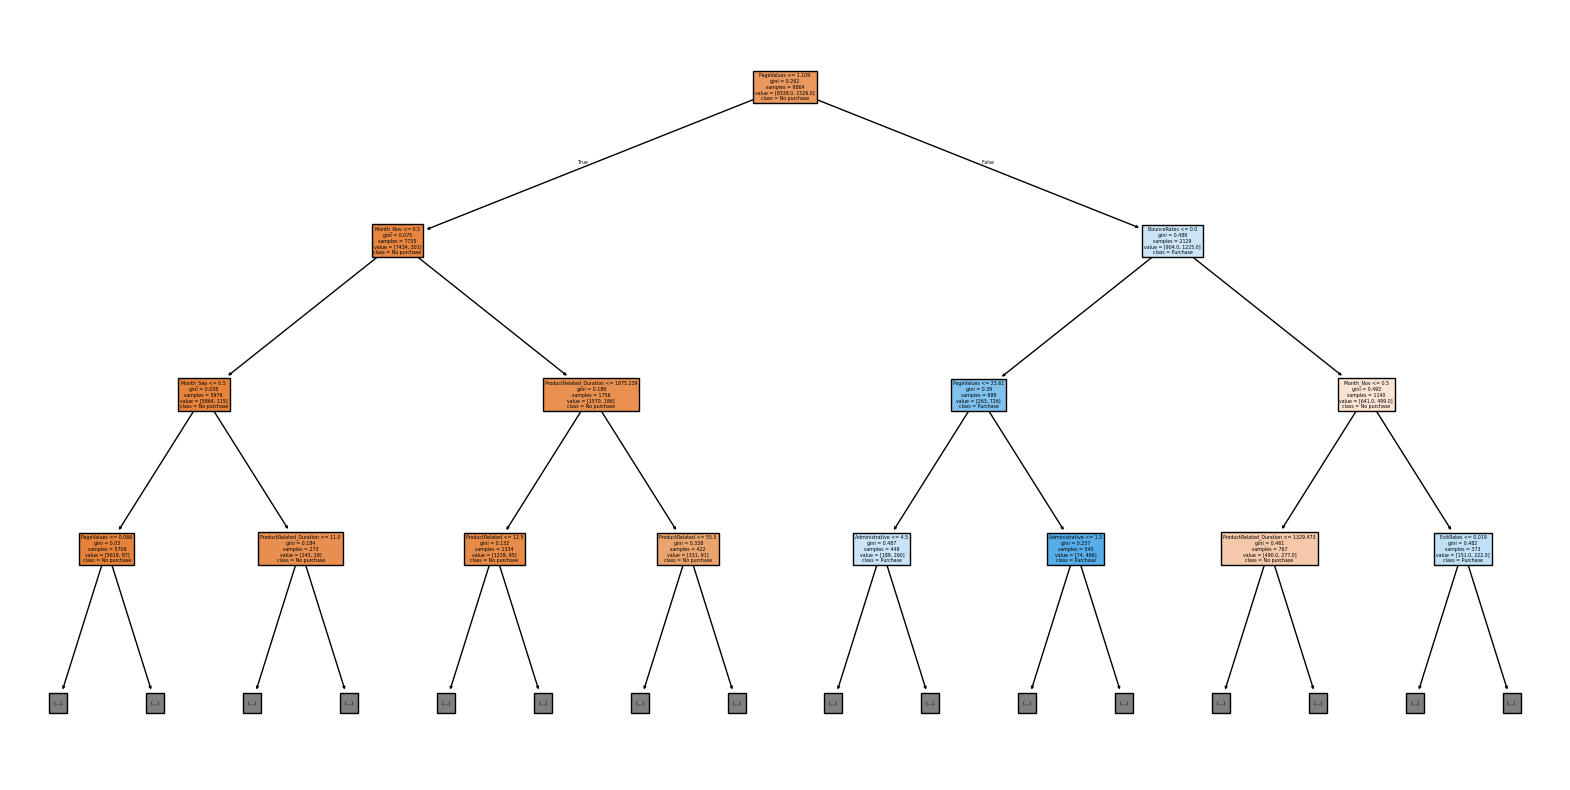

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt, 
    feature_names=X_train.columns,
    class_names=['No purchase', 'Purchase'],
    filled=True,
    max_depth=3
)
plt.show()

## Decision Tree - Pruning 

In [44]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [46]:
f1_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

In [51]:
best_alpha = ccp_alphas[f1_scores.index(max(f1_scores))]
print("Best ccp_alpha: ", best_alpha)
print("Best F1 score: ", max(f1_scores))

Best ccp_alpha:  0.009430364288143478
Best F1 score:  0.6431718061674009


In [57]:
dt_pruned = DecisionTreeClassifier(random_state=42, 
                                   ccp_alpha=best_alpha)

dt_pruned.fit(X_train, y_train)
y_test_pred = dt_pruned.predict(X_test)

print("F1 score fot best alpha: ", f1_score(y_test, y_test_pred))
print("\nClassification report: \n", classification_report(y_test, y_test_pred))

F1 score fot best alpha:  0.6431718061674009

Classification report: 
               precision    recall  f1-score   support

       False       0.95      0.89      0.92      2084
        True       0.56      0.76      0.64       382

    accuracy                           0.87      2466
   macro avg       0.75      0.83      0.78      2466
weighted avg       0.89      0.87      0.88      2466



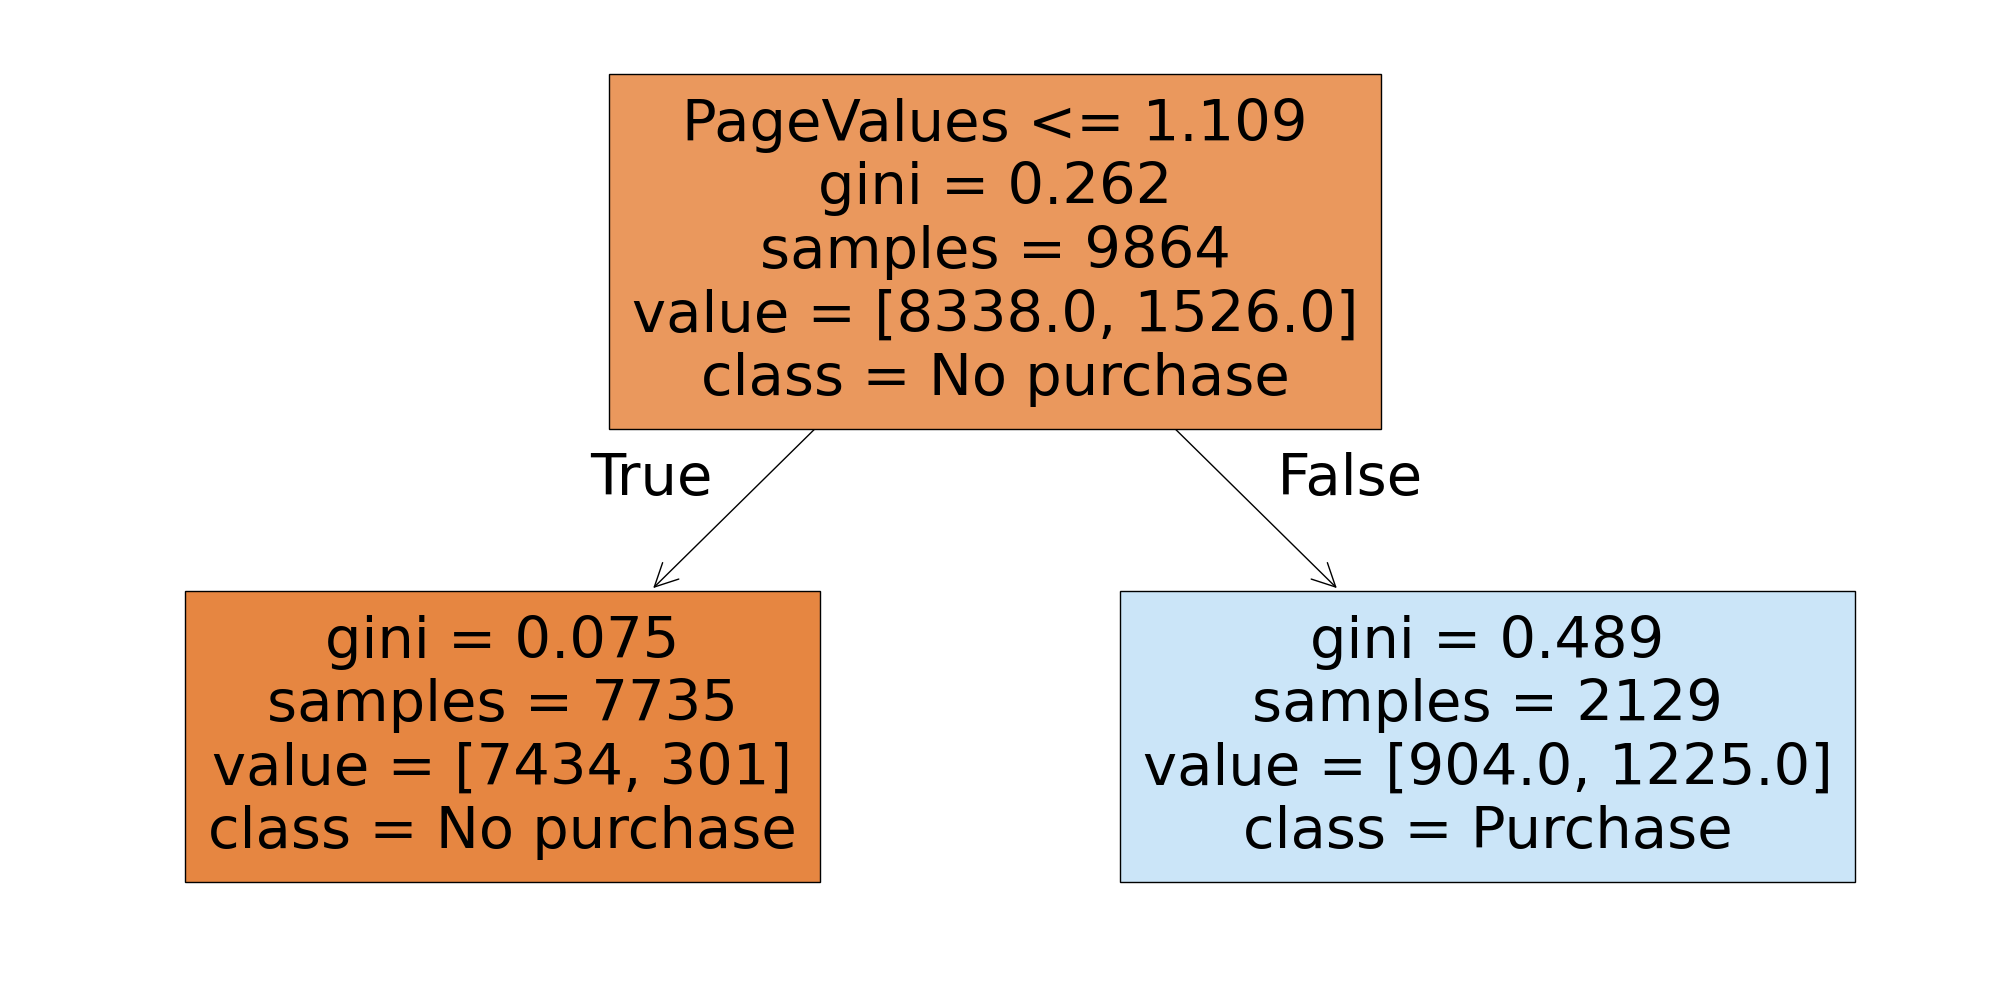

In [67]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_pruned,
    feature_names=X_train.columns,
    class_names=['No purchase', 'Purchase'],
    filled=True,
    max_depth=3
)
plt.tight_layout()
plt.savefig('pruned_tree.png')
plt.show()



## Compare Pruned and Unpruned model

In [65]:
train_f1_unpruned = f1_score(y_train, dt.predict(X_train))
test_f1_unpruned  = f1_score(y_test, dt.predict(X_test))

# Pruned
train_f1_pruned = f1_score(y_train, dt_pruned.predict(X_train))
test_f1_pruned  = f1_score(y_test, dt_pruned.predict(X_test))

print("UNPRUNED TREE")
print("Train F1:", train_f1_unpruned)
print("Test  F1:", test_f1_unpruned)

print("\nPRUNED TREE")
print("Train F1:", train_f1_pruned)
print("Test  F1:", test_f1_pruned)

UNPRUNED TREE
Train F1: 1.0
Test  F1: 0.5570291777188329

PRUNED TREE
Train F1: 0.6703146374829001
Test  F1: 0.6431718061674009


### The unpruned Decision Tree severely overfits, achieving near-perfect training performance but poor generalization. Cost-complexity pruning reduces model complexity, leading to a lower training F1-score but a higher and more reliable test F1-score